In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
probs = [
    [0.1, 0.02],
    [0.02, 0.1],
]
n1 = 50
n2 = 50
n = n1 + n2
G = nx.stochastic_block_model([n1, n2], probs, seed=0) # グラフの生成

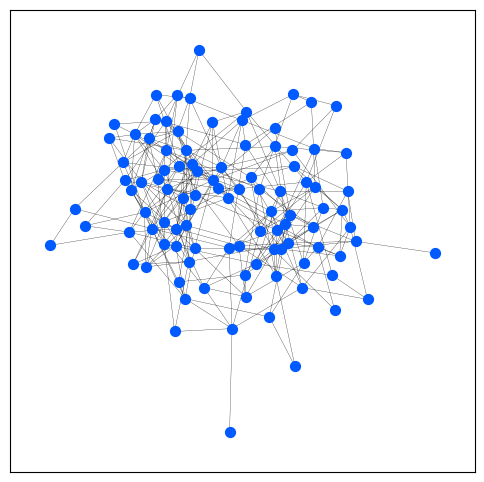

In [3]:
# グラフの描画
pos = nx.layout.spring_layout(G, seed=3)
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color='#005aff')

In [4]:
# 訓練とテストの分割
nL = 20 # 訓練データ数
L = np.random.choice(n, size=nL, replace=False)
U = np.array(list(set(range(n)) - set(L.tolist())))

In [5]:
fV = np.zeros(nL, int)
for i, v in enumerate(L):
    if v < n1:
        p = 0.8
    else:
        p = 0.2
    if np.random.rand() < p:
        fV[i] = 1 # 正例

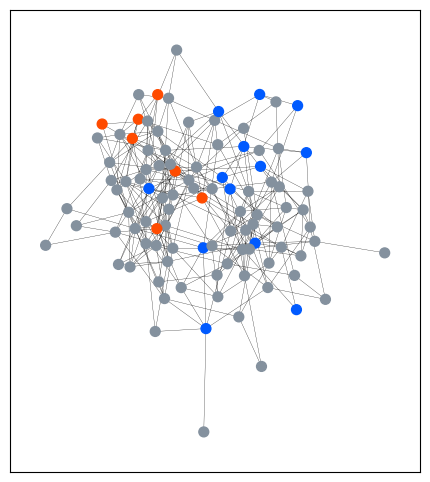

In [6]:
# 訓練ラベルの図示
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 3, 1)
c = [0 for i in range(n)]
for i in range(n):
    if i in L and fV[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and fV[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        c[i] = '#84919e'
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c)

In [7]:
W = nx.adjacency_matrix(G).todense() # 隣接行列
D = np.diag(W.sum(1)) # 次数行列

In [8]:
yhat = np.linalg.inv(D[U][:, U] - W[U][:, U]) @ W[U][:, L] @ fV # 式 (2.28) による予測
yhat

array([0.271795  , 0.58039511, 0.5938884 , 0.50032372, 0.51563865,
       0.58045476, 0.47187501, 0.65744919, 0.62086172, 0.35813378,
       0.46134331, 0.46898014, 0.61509325, 0.55601098, 0.69988793,
       0.40559635, 0.59494261, 0.33318643, 0.5600406 , 0.50448514,
       0.30752334, 0.36582523, 0.55933722, 0.58033546, 0.61649017,
       0.69926796, 0.33302571, 0.43600225, 0.54492362, 0.42892477,
       0.33982527, 0.45897483, 0.59223362, 0.54976591, 0.47555974,
       0.52334264, 0.49289742, 0.38625763, 0.65844919, 0.65406361,
       0.5805895 , 0.32111052, 0.18130926, 0.21722399, 0.20381893,
       0.38808143, 0.        , 0.30749015, 0.20752574, 0.39323867,
       0.2377338 , 0.249102  , 0.34214925, 0.32002087, 0.24706714,
       0.19775586, 0.25865674, 0.18130926, 0.29789249, 0.36171834,
       0.2168805 , 0.16647526, 0.15053239, 0.1725515 , 0.36972895,
       0.2866803 , 0.13932437, 0.20846052, 0.3089883 , 0.18999654,
       0.23046376, 0.35947107, 0.19261897, 0.27566088, 0.26858

In [9]:
# スコアの図示
ax = fig.add_subplot(1, 3, 2)
c = [None for i in range(n)]
for i in range(n):
    if i in L and fV[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and fV[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        p = yhat[U.tolist().index(i)]
        c[i] = (p, 0.294 * p + 0.353 * (1 - p), 1 - p)
c = np.array(c, dtype=object)
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c)

In [10]:
# 予測ラベルの図示
ax = fig.add_subplot(1, 3, 3)
c = [0 for i in range(n)]
for i in range(n):
    if i in L and fV[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and fV[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        p = yhat[U.tolist().index(i)]
        if p > 0.5:
            c[i] = '#ff4b00'
        else:
            c[i] = '#005aff'
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c)

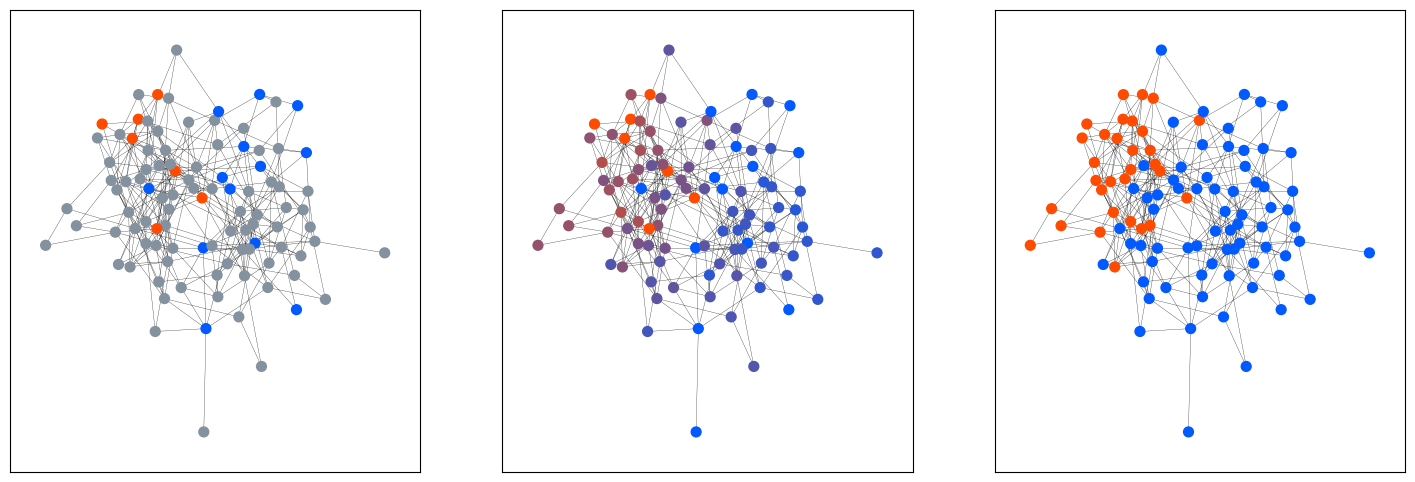

In [11]:
fig